In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt

In [8]:
#load the data set
data=loadmat('ex8data1.mat')
X=data['X']
Xval=data['Xval']
Yval=data['yval']

In [5]:
X.shape

(307, 2)

In [6]:
Xval.shape

(307, 2)

In [9]:
Yval.shape

(307, 1)

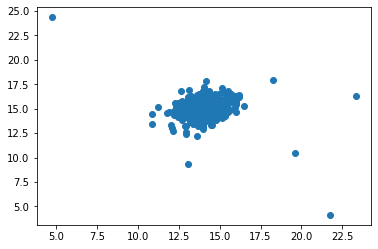

In [10]:
#plot scatter plot
plt.scatter(X[:,0],X[:,1])

In [11]:
mu=X.mean(axis=0)
sigma=X.var(axis=0)
mu,sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [12]:
from scipy import stats
p=np.zeros((X.shape[0],X.shape[1])) #all 307 values initialized to zero by taking new array p
p[:,0]=stats.norm(mu[0],sigma[0]).pdf(X[:,0])
p[:,1]=stats.norm(mu[1],sigma[1]).pdf(X[:,1])

In [15]:
pval=np.zeros((Xval.shape[0],Xval.shape[1]))
pval[:,0]=stats.norm(mu[0],sigma[0]).pdf(Xval[:,0])
pval[:,1]=stats.norm(mu[1],sigma[1]).pdf(Xval[:,1])
pval.shape

(307, 2)

In [24]:
#find threshold 
def select_threshold(pval,yval):
    best_epsilon=0
    best_f1=0
    f1=0
    step=(pval.max()-pval.min())/1000
    for epsilon in np.arange(pval.min(),pval.max(),step):
        preds=pval<epsilon
        tp=np.sum(np.logical_and(preds==1,yval==1)).astype(float)
        fp=np.sum(np.logical_and(preds==1,yval==0)).astype(float)
        fn=np.sum(np.logical_and(preds==0,yval==1)).astype(float)
        
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)
        f1=(2*precision*recall)/(precision+recall)
        
        if f1>best_f1:
            best_f1=f1
            best_epsilon=epsilon
            
    return best_epsilon,best_f1

epsilon,f1=select_threshold(pval,Yval)

epsilon,f1



<ipython-input-24-6756692b406c>:13: RuntimeWarning: invalid value encountered in double_scalars
  precision=tp/(tp+fp)


(0.009566706005956842, 0.7142857142857143)

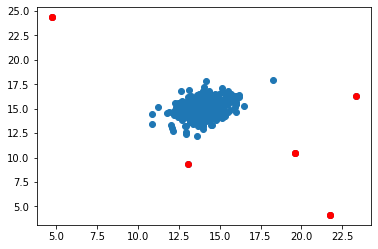

In [22]:
outliers=np.where(p<epsilon)
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[outliers[0],0],X[outliers[0],1],color='r')

# End of program 4